## EPL QUARANTINE POOLS

At the start of the COVID-19 lockdown in the UK, the English Premier League was left with 92 games to play - but no certainty that they could be.

One way to mitigate the risk would have been to put the teams into a 'bubble' (or bubbles).

My original thought was to split the teams into North and South pools. Unfortunately, this would not help to get through a significant number of games. 

So was there another set of pools - each containing ten teams - that would?

At the start of the COVID-19 lockdown in the UK, the English Premier League was left with 92 games to play - but no certainty that they could be. One way to mitigate the risk would have been to put the teams into a 'bubble' (or bubbles). Was there another set of pools - each containing ten teams - that would?

In [31]:
# libraries
import itertools
import pandas as pd
import numpy as np
import time
import matplotlib.pylab as plt
import statistics
from collections import Counter

In [32]:
# these are the teams
teams = sorted(['MCI', 'NEW', 'EVE', 'LIV', 'BUR', 'WOL', 'LEI', 'SHE', 'NOR', 'MUN', 'WAT', 'BRI', 'AST', 'WES', 'TOT', 'AFC', 'CHE', 'SOU', 'CRY', 'ARS'])
print(teams,)

['AFC', 'ARS', 'AST', 'BRI', 'BUR', 'CHE', 'CRY', 'EVE', 'LEI', 'LIV', 'MCI', 'MUN', 'NEW', 'NOR', 'SHE', 'SOU', 'TOT', 'WAT', 'WES', 'WOL']


How many combinations of teams are there?

In [33]:
poss = set(itertools.combinations(teams, 10))      # all 184,756 combos of available teams. sets are easier to deal with for this task
print(f'There are {len(poss)} possible combinations of teams.')

There are 184756 possible combinations of teams.


That's a lot of possibilities to explore! 

In [34]:
# import the remaining 92 games and format them into the 3 letter team codes (eg LIV)
with open('remaining_games.csv', 'r') as f:
    g = f.read()
    g = g.replace('\t','').replace(' ','').replace('Manchester','M')
    g = g.split('\n')
    
    remaining = []
    for n in range(0, len(g)):
        ha = g[n].split(',')
        home = ha[0][0:3].upper()
        away = ha[1][0:3].upper()
        game = [home,away]
        remaining.append(game)
        
print(f'There are {len(remaining)} games remaining.')

There are 92 games remaining.


### What's left?

Let's start by taking a look at the games that are left to play.

In [35]:
games = set(tuple(x) for x in remaining)

teamsdf = pd.DataFrame(teams, columns = ['Team'])

home, away  = [], []
for team in teams:
    tH, tA = [], []
    
    for game in games:
        if team in game[0]:
            tH.append(game[1])
        if team in game[1]:
            tA.append(game[0])
            
    home.append(tH)
    away.append(tA)
    
teamsdf['Home'] = home
teamsdf['H'] = teamsdf.Home.str.len()
teamsdf['Away'] = away
teamsdf['A'] = teamsdf.Away.str.len()
teamsdf['Ttl'] = teamsdf.H + teamsdf.A

teamsdf

,Team,Home,H,Away,A,Ttl
0,AFC,"[SOU, NEW, CRY, LEI, TOT]",5,"[EVE, WOL, MCI, MUN]",4,9
1,ARS,"[NOR, LIV, LEI, WAT]",4,"[TOT, MCI, WOL, SOU, BRI, AST]",6,10
2,AST,"[CHE, SHE, MUN, CRY, WOL, ARS]",6,"[NEW, WES, LIV, EVE]",4,10
3,BRI,"[NEW, MCI, LIV, MUN, ARS]",5,"[LEI, BUR, NOR, SOU]",4,9
4,BUR,"[SHE, WOL, BRI, WAT]",4,"[MCI, NOR, CRY, LIV, WES]",5,9
5,CHE,"[WOL, MCI, NOR, WAT]",4,"[CRY, SHE, AST, WES, LIV]",5,9
6,CRY,"[CHE, TOT, MUN, BUR]",4,"[AFC, LEI, WOL, AST, LIV]",5,9
7,EVE,"[SOU, LEI, AFC, LIV, AST]",5,"[NOR, SHE, WOL, TOT]",4,9
8,LEI,"[MUN, BRI, CRY, SHE]",4,"[WAT, EVE, ARS, TOT, AFC]",5,9
9,LIV,"[BUR, AST, CRY, CHE]",4,"[NEW, MCI, ARS, BRI, EVE]",5,9


And now graphically

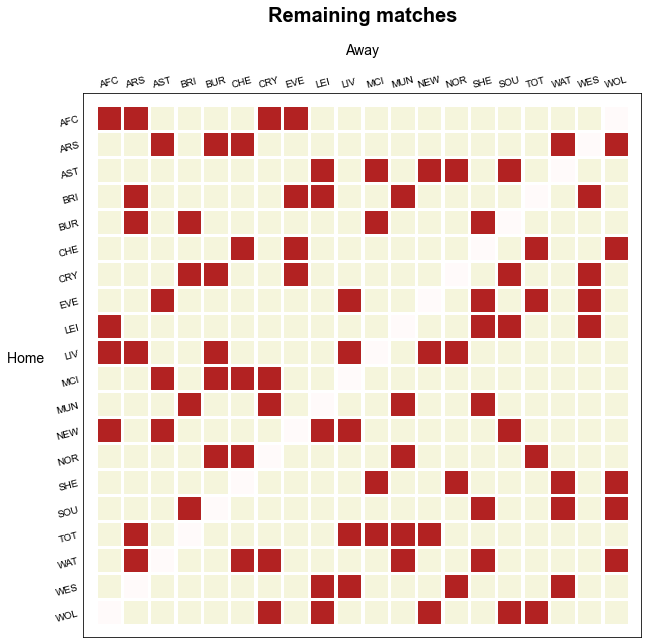

In [36]:
fig, ax = plt.subplots()

x = range(len(teams))

# see who plays who and define a colour
i = 0
for team in teams:
    
    colors = []
        
    for team2 in teams:
            
        if team2 == team:
            
            c = 'snow'
            
        else:
        
            c = 'beige'       # start with the assumption that the two teams do not play

            for game in games:
                
                if team in game[0] and team2 in game[1]:
                    c = 'firebrick'
                
        colors.append(c)
                           
    y = [i] * len(teams)        
        
    ax.scatter(x, y, marker = 's', s = 500, color = colors)
    
    i += 1

# titles
plt.title('Remaining matches', weight='bold', size='20')
plt.xlabel('\nAway\n', size=14)
ax.xaxis.set_label_position('top') 
plt.ylabel('Home             ',  rotation=0, size=14)

# axes
ax.xaxis.tick_top()
ax.set_xticklabels(teams, rotation=15)
ax.set_xticks(x[::1])
ax.set_yticklabels(reversed(teams), rotation=15)
ax.set_yticks(x[::1])
ax.tick_params(axis=u'both', which=u'both',length=0)    # hides ticks

plt.rcParams["font.family"] = "Arial"

fig.set_size_inches(10, 10)
plt.show()

# BEST POOLS

Now, let's take a look at each of these 184,756 bubbles and see how many games they might be able to play. 

It usually takes less than 90 seconds to calculate all that (even on my puny laptop).

In [37]:
#### DF version

# note that the games are each given an id number, to make it easier to deal with them

# also note that we don't need to calculate the 'other pool' in each bubble --- if both games teams aren't in poolA1, they have to be in poolA2

print('0', end=' ')     # to show it has started.Sometimes it jams

start_time = time.time()

l1, l2, l3  = [], [], []

groupID = 0
for combo in poss:
    
    if groupID % 10000 == 0:
        print('>', end=' ')
                
    playable_mini = []
    
    for game in remaining:
        
        gameID = remaining.index(game)
        
        if game[0] in combo and game[1] in combo:
            playable_mini.append(gameID)
        elif game[0] not in combo and game[1] not in combo:
            playable_mini.append(gameID)
            
    l1.append(groupID)
    l2.append(combo)
    l3.append(playable_mini)
          
    groupID += 1
           
print(f"{groupID} in %s seconds =^_^=" % (time.time() - start_time))

0 > > > > > > > > > > > > > > > > > > > 184756 in 90.99429845809937 seconds =^_^=


In [38]:
# put it into a datframe

l1234 = list(zip(l1,l2,l3))
bubbledf = pd.DataFrame(l1234, columns=['GroupID','PoolA1','Games'])
bubbledf['Ttl'] = bubbledf.Games.str.len()
pd.set_option('display.max_colwidth', 60)
bubbledf

,GroupID,PoolA1,Games,Ttl
0,0,"(AFC, AST, BRI, BUR, CHE, LIV, NOR, TOT, WAT, WOL)","[0, 3, 6, 17, 18, 19, 20, 26, 31, 32, 34, 35, 37, 39, 40...",35
1,1,"(AFC, BRI, CRY, LEI, LIV, MUN, NOR, SHE, SOU, WOL)","[0, 2, 4, 6, 7, 12, 14, 15, 16, 17, 18, 20, 21, 25, 29, ...",43
2,2,"(AFC, ARS, BUR, CHE, EVE, LEI, LIV, MUN, NEW, SOU)","[8, 10, 11, 12, 19, 23, 26, 28, 31, 35, 36, 43, 45, 47, ...",33
3,3,"(AST, CHE, EVE, LEI, LIV, MCI, MUN, NOR, SHE, WES)","[5, 6, 7, 10, 11, 13, 16, 17, 18, 19, 20, 22, 24, 28, 29...",43
4,4,"(BRI, BUR, EVE, MCI, MUN, NEW, NOR, SHE, WAT, WOL)","[3, 4, 6, 7, 12, 13, 15, 17, 19, 20, 25, 29, 35, 37, 38,...",42
...,...,...,...,...
184751,184751,"(BRI, BUR, CHE, CRY, MCI, MUN, NOR, SHE, TOT, WOL)","[1, 4, 9, 10, 14, 16, 19, 20, 22, 23, 24, 25, 28, 31, 32...",44
184752,184752,"(AFC, AST, BUR, LEI, LIV, MCI, MUN, NEW, SHE, SOU)","[3, 4, 5, 8, 11, 12, 13, 14, 20, 27, 28, 29, 30, 33, 34,...",43
184753,184753,"(AFC, ARS, AST, BUR, CHE, MCI, NEW, NOR, WES, WOL)","[0, 1, 4, 6, 8, 9, 10, 14, 15, 16, 18, 20, 21, 22, 23, 2...",47
184754,184754,"(AFC, BRI, CHE, LEI, MCI, NOR, SHE, SOU, TOT, WAT)","[1, 2, 8, 10, 14, 15, 16, 21, 22, 23, 24, 26, 32, 34, 35...",46


In [39]:
mx = bubbledf['Ttl'].max()
mn = bubbledf['Ttl'].min()

print(f'The most games that could be played is {mx}.  That leaves {len(remaining) - mx} left to be played.\n')
print(f'The min number of games playable is {mn}.')

The most games that could be played is 60.  That leaves 32 left to be played.

The min number of games playable is 28.


As we can see below, there are six bubbles that could get 60 games played. 

In [40]:
bubbledf.loc[bubbledf['Ttl'] > 59]

,GroupID,PoolA1,Games,Ttl
5642,5642,"(ARS, BRI, BUR, CHE, LIV, MCI, NOR, SOU, WAT, WES)","[0, 2, 3, 4, 5, 7, 9, 11, 14, 16, 17, 18, 19, 20, 22, 23...",60
5646,5646,"(AFC, AST, CRY, EVE, LEI, MUN, SHE, TOT, WES, WOL)","[0, 2, 4, 5, 7, 8, 9, 11, 12, 16, 17, 18, 19, 20, 22, 23...",60
31770,31770,"(ARS, BRI, BUR, LIV, MCI, NEW, NOR, SOU, WAT, WES)","[0, 2, 4, 5, 6, 7, 9, 11, 17, 18, 19, 20, 22, 23, 26, 27...",60
69132,69132,"(ARS, BRI, BUR, CHE, LIV, MCI, NEW, NOR, SOU, WAT)","[0, 2, 4, 5, 7, 8, 9, 11, 12, 16, 17, 18, 19, 20, 22, 23...",60
76586,76586,"(AFC, AST, CHE, CRY, EVE, LEI, MUN, SHE, TOT, WOL)","[0, 2, 4, 5, 6, 7, 9, 11, 17, 18, 19, 20, 22, 23, 26, 27...",60
123024,123024,"(ARS, BRI, BUR, CHE, LIV, MCI, NEW, NOR, WAT, WES)","[0, 4, 5, 7, 9, 11, 16, 17, 18, 20, 23, 26, 27, 29, 30, ...",60
128795,128795,"(AFC, AST, CRY, EVE, LEI, MUN, NEW, SHE, TOT, WOL)","[0, 2, 3, 4, 5, 7, 9, 11, 14, 16, 17, 18, 19, 20, 22, 23...",60
183478,183478,"(AFC, AST, CRY, EVE, LEI, MUN, SHE, SOU, TOT, WOL)","[0, 4, 5, 7, 9, 11, 16, 17, 18, 20, 23, 26, 27, 29, 30, ...",60


In the chart below, you can see how far from achieving our target we still are.

(It only shows a small number of the pools to give you a sense of it. Anymore and it would be too messy.)

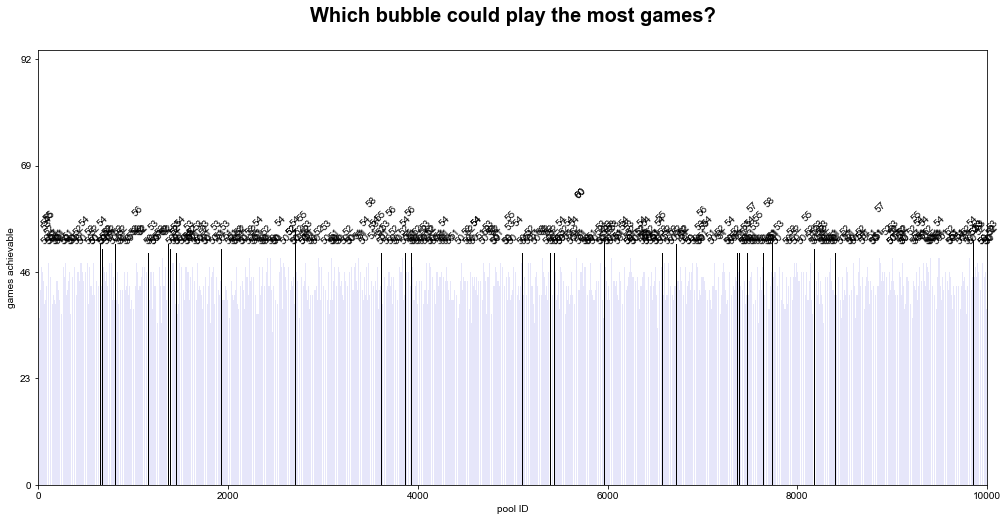

In [41]:
fig, ax = plt.subplots()
plt.title('Which bubble could play the most games?\n', weight='bold', size=20)

y = bubbledf['Ttl'][0:10000]
x = range(len(y))

colors = []
i = 0
for value in y:

    if value >= 50:
        colors.append('k')
        ax.annotate(value, xy=(i,value+2), rotation=45)
    else:
        colors.append('lavender')
    i += 1
        
ax = ax.bar(x, y, color=colors)
plt.xlabel('pool ID')
plt.ylabel('games achievable')
plt.ylim(0,94)
plt.xlim(0,10000)
plt.yticks([0,23,46,69,92])

plt.rcParams["font.family"] = "Arial"

fig.set_size_inches(17, 8)
plt.show()

Here we can see the frequency of each total the bubbles produced: a beautiful bell curve

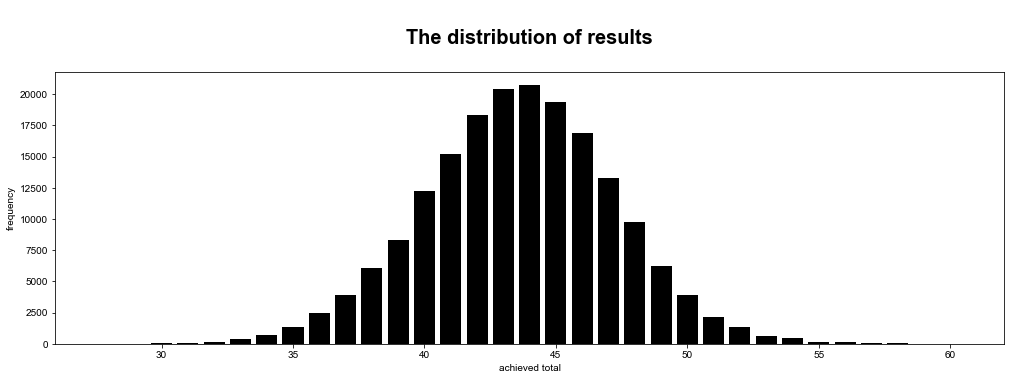

In [42]:
fig, ax = plt.subplots()

plt.title('\nThe distribution of results\n', weight='bold', size=20)

x = list(bubbledf['Ttl'])
freqdf = pd.DataFrame(Counter(x).items(), columns=['Total','Freq'])

x = freqdf['Total']
y = freqdf['Freq']
ax = ax.bar(x, y, color='k')
plt.xlabel('achieved total')
plt.ylabel('frequency')


plt.rcParams["font.family"] = "Arial"

fig.set_size_inches(17, 5)
plt.show()

## A SECOND ROUND OF BUBBLES

Even with the best result (60), we don't get through two-thirds of the games.

Could we get through each bubble's remaining games with a new set of bubbles?

That would involve looking at each groups' remaining games, and calculating again. 

That's 184k x 184k calculations, and at 90 seconds each, my calculator says that would take 181 days.

Actually the initial script I wrote was set to take 42 days. After some tweaks, that came down 13. 

Even with a very fast computer, that method was going to take too long. 
 

One around this is to make the script only re-calculate the bubbles ahead of it. 

Eg. Bubble 3 would not include calculations for bubbles 1 and 2 (or itself), but would look at every pool from 4 onwards. 

By not 'backtracking', this would significantly decreased the time to calculate for each pool. 

Below is a quick timetest (involing smaller bubbles) to show how much quicker it gets as it goes through the calculations.

In [14]:
### 4 in pool version
## first part = recalculating 

poss = set(itertools.combinations(teams, 4))  

start_time = time.time()

playables = {}
pools = {}

groupID = 0
for combo in poss:
                
    playable_mini = []
        
    for game in remaining:
        
        gameID = remaining.index(game)
        
        if game[0] in combo and game[1] in combo:
            playable_mini.append(gameID)
        elif game[0] not in combo and game[1] not in combo:
            playable_mini.append(gameID)
            
    playables[groupID] = playable_mini
    
    pools[groupID] = {combo}
        
    groupID += 1
           
# this sorts out pool B

poolBs = {}
start_time = time.time()

timetest = {}

for groupID in playables:
    cogroups = []
    a = playables[groupID]   
    best = 0       
    
    j = groupID + 1
    while j < len(playables):                     
        b = playables[j]   
        ab = a + list(set(b) - set(a))
        if len(ab) > best:
            best = len(ab)       
            cogroups.append(j)          
        j += 1    
    
    poolBs[groupID] = dict(best = best, cogroups = cogroups)   
    
    if groupID % 100 == 0:
        gap = time.time() - start_time
        timetest[groupID] = gap
        print(f'{groupID}, %s ' % (gap))
        
print("--- %s seconds ---" % (time.time() - start_time))

# note this is an older version of the script used in the main section

0, 0.06250190734863281 
100, 6.284881830215454 
200, 12.64859676361084 
300, 19.533241033554077 
400, 24.812548637390137 
500, 31.202882528305054 
600, 36.68126702308655 
700, 42.974815368652344 
800, 47.80038571357727 
900, 53.82118105888367 
1000, 59.3092360496521 
1100, 63.494123697280884 
1200, 67.41351509094238 
1300, 71.88739490509033 
1400, 76.86035919189453 
1500, 80.45276856422424 
1600, 84.04387617111206 
1700, 87.49655604362488 
1800, 92.03835892677307 
1900, 96.9123170375824 
2000, 100.34110593795776 
2100, 103.34562277793884 
2200, 106.20291757583618 
2300, 109.04590129852295 
2400, 111.71574878692627 
2500, 114.4328670501709 
2600, 117.28930997848511 
2700, 120.60215735435486 
2800, 123.74070119857788 
2900, 126.23905873298645 
3000, 128.2524974346161 
3100, 130.68971943855286 
3200, 133.21896362304688 
3300, 135.60765933990479 
3400, 137.82542729377747 
3500, 139.40246510505676 
3600, 140.82337594032288 
3700, 142.08717012405396 
3800, 143.29845142364502 
3900, 144.39111

As you can see, this speeds up significantly towards the end, because it doesn't have to backtrack.

In [15]:
calcs = [x for x in timetest.keys()]
stamps = [x for x in timetest.values()]

timetestdf = pd.DataFrame([])
timetestdf['calcs'] = calcs
timetestdf['stamps'] = stamps
timetestdf['gap'] = timetestdf['stamps'].diff()
timetestdf['5roll'] = timetestdf['gap'].rolling(window=5).mean()
timetestdf['moving'] = timetestdf['gap'].cumsum() / (timetestdf['calcs']/100)

timetestdf.head()

,calcs,stamps,gap,5roll,moving
0,0,0.062502,NaN,NaN,NaN
1,100,6.284882,6.222380,NaN,6.222380
2,200,12.648597,6.363715,NaN,6.293047
3,300,19.533241,6.884644,NaN,6.490246
4,400,24.812549,5.279308,NaN,6.187512


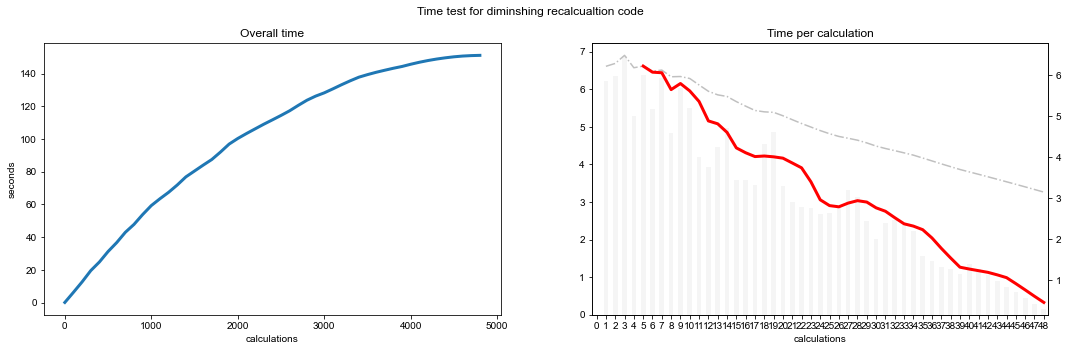

In [16]:
# then, plotting
    
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Time test for diminshing recalcualtion code')

ax1.set_title("Overall time")
ax1.plot(calcs, stamps, linewidth=3)
ax1.set_ylabel('seconds')
ax1.set_xlabel('calculations')


ax2.set_title("Time per calculation")

a = timetestdf['gap'].plot(kind='bar', color='whitesmoke')
b = timetestdf['moving'].plot(secondary_y=True, color='silver', style = '-.', label='Rolling av.')
c = timetestdf['5roll'].plot(secondary_y=True, color='red', label='5pt rolling av.', linewidth=3)

#a, = ax2.plot(calcs[1:], fivept, linewidth=3, label='5pt rolling av.')
#b, = ax2.plot(calcs[1:], gap[1:], '--', c='cyan',label='Time per calc')
#c, = ax2.plot(calcs[1:], rolling, '-.', c='silver', label='Rolling av.')
#ax2.legend(handles=[b, c])
ax2.set_xlabel('calculations')
#plt.locator_params(axis='x', nbins=1)


plt.rcParams["font.family"] = "Arial"

fig.set_size_inches(18, 5)
plt.show()

So we see this is potentially a good method for calculating Pool B. 

Unfortunately, this would still take 3-4 days (at least it would on this laptop).

### MAKE IT QUICKER

There are three further ways to make this quicker. 

Firstly, we can narrow down the data that it looks at. 

There are many combinations that won't get close to making 100%.

For example, two bubbles of 28. (56) Or a 60 and a 31. (91)

So we could take those combinations out.

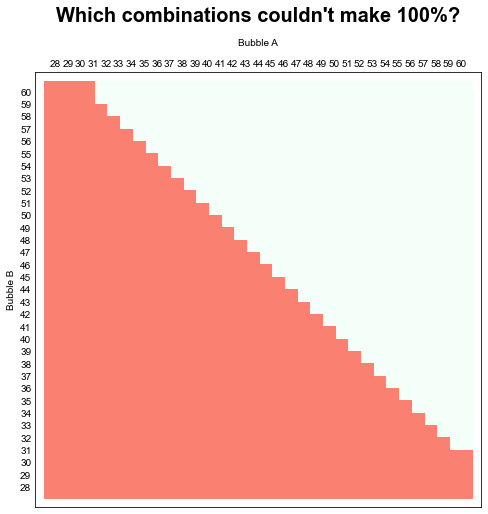

In [29]:
A = [n for n in range(28,61)]
B =  [n for n in range(28,61)]

fig, ax = plt.subplots()

i = 0
for a in A:
    
    colors = []
        
    for b in A:
            
        if a + b >= 92:
            
            c = 'mintcream'
            
        else:
        
            c = 'salmon'       # start with the assumption that the two teams do not play

                
        colors.append(c)
                           
    B = [28+i] * len(A)        
        
    ax.scatter(A, B, marker = 's', s = 500, color = colors)
    
    i += 1

# titles
plt.title("Which combinations couldn't make 100%?", weight='bold', size='20')
plt.xlabel('\nBubble A\n')
ax.xaxis.set_label_position('top') 
plt.ylabel('Bubble B')

# axes
ax.xaxis.tick_top()
ax.set_xticks(A[::1])
ax.set_yticks(A[::1])

ax.tick_params(axis=u'both', which=u'both',length=0)    # hides ticks


plt.rcParams["font.family"] = "Arial"

fig.set_size_inches(8, 8)
plt.show()

But as the following graph shows, those combinations of bubbles at the extremes do not produce high reuslts.

The lighter the color, the lower the Bubble B result.

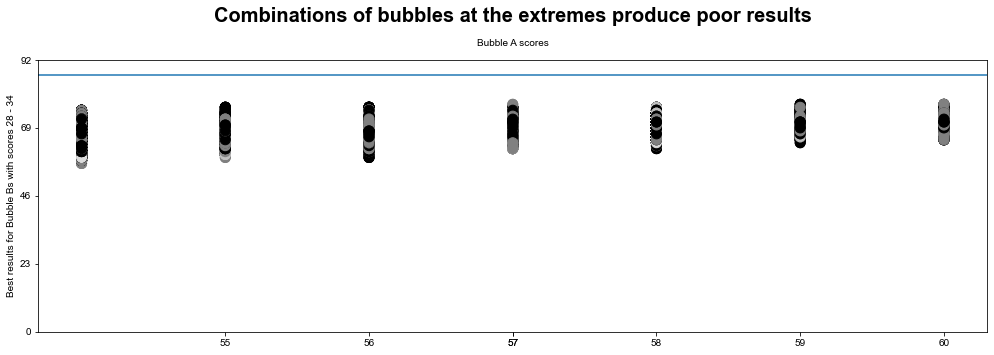

In [99]:
a1, a2 = 54, 60
Xdf = bubbledf.loc[(bubbledf['Ttl'] >= a1) & (bubbledf['Ttl'] <= a2)]

b1, b2 = 28, 34
Ydf = bubbledf.loc[(bubbledf['Ttl'] >= b1) & (bubbledf['Ttl'] <= b2)]

gamesX, gamesY = list(Xdf['Games']), list(Ydf['Games'])
idX, idY = list(Xdf['GroupID']), list(Ydf['GroupID'])
Alist, Blist, ABlist, clist = [], [], [], []

i = 0
for x in range(len(idX)):
    A = gamesX[i]
   
    j = i+1
    for y in range(len(idY) - j):
        B = gamesY[j]
        
        AB = A + list(set(B) - set(A))
        
        Alist.append(len(A))
        Blist.append(len(B))
        ABlist.append(len(AB))
        
        # for color coding
        
        colorrange = b2 - b1
        colorn = len(B) - 28
        if colorn <= (colorrange / 4):
            c = 'gainsboro'
        elif colorn < (colorrange / 2):
            c = 'silver'
        elif colorn < (colorrange / 1.25):
            c = 'grey'
        elif colorn < (colorrange):
            c = 'k'
        clist.append(c)
        
        j += 1  
    i += 1
    
    
# plot
fig, ax = plt.subplots()

plt.title("Combinations of bubbles at the extremes produce poor results", weight='bold', size='20')
ax.xaxis.set_label_position('top') 

ax = ax.scatter(Alist, ABlist, s = 100, color=clist)

plt.axhline(87)

plt.xlabel('\nBubble A scores\n')
plt.xticks([55,56,57,57,58,59,60])

plt.ylabel(f'Best results for Bubble Bs with scores {b1} - {b2}')
plt.yticks([0,23,46,69,92])
plt.ylim(0,92)

fig.set_size_inches(17, 5)
plt.show()

Let's look at the 60 Bubbles versus the full spetrum of Bubble B results. 

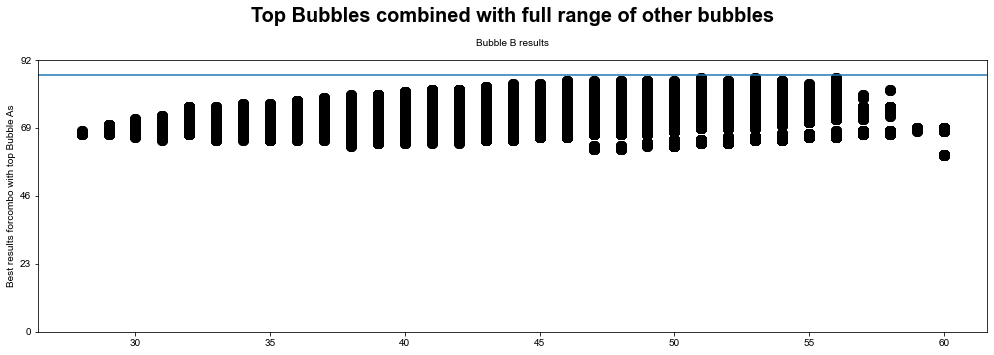

In [101]:
a1, a2 = 60, 60
Xdf = bubbledf.loc[(bubbledf['Ttl'] >= a1) & (bubbledf['Ttl'] <= a2)]

b1, b2 = 28, 60
Ydf = bubbledf.loc[(bubbledf['Ttl'] >= b1) & (bubbledf['Ttl'] <= b2)]

gamesX, gamesY = list(Xdf['Games']), list(Ydf['Games'])
idX, idY = list(Xdf['GroupID']), list(Ydf['GroupID'])
Alist, Blist, ABlist, clist = [], [], [], []

i = 0
for x in range(len(idX)):
    A = gamesX[i]
   
    j = i+1
    for y in range(len(idY) - j):
        B = gamesY[j]
        
        AB = A + list(set(B) - set(A))
        
        Alist.append(len(A))
        Blist.append(len(B))
        ABlist.append(len(AB))
        
        # no color coding
 
        j += 1  
    i += 1
    
    
# plot
fig, ax = plt.subplots()

plt.title("Top Bubbles combined with full range of other bubbles", weight='bold', size='20')
ax.xaxis.set_label_position('top') 

ax = ax.scatter(Blist, ABlist, s = 100, color='k')

plt.axhline(87)

plt.xlabel('\nBubble B results\n')
#plt.xticks([55,56,57,57,59,60])

plt.ylabel(f'Best results forcombo with top Bubble As')
plt.yticks([0,23,46,69,92])
plt.ylim(0,92)

fig.set_size_inches(17, 5)
plt.show()

As you can see, it is only once we get into the top half of Bubble results that we can achieve at least 87. 

(87 is the top result I've been able to find.)

Therefore we can fairly confidently narrow down the search to all Bubbles with reults of 45 or above. 

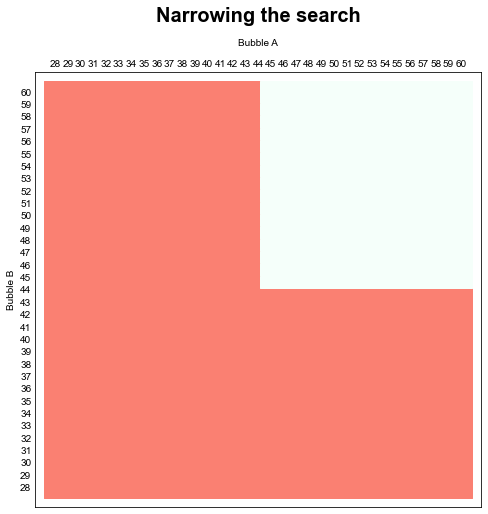

In [104]:
A = [n for n in range(28,61)]
B =  [n for n in range(28,61)]

fig, ax = plt.subplots()

i = 0
for a in A:
    
    colors = []
        
    for b in A:
            
        if a >= 45 and b >= 45:
            
            c = 'mintcream'
            
        else:
        
            c = 'salmon'       # start with the assumption that the two teams do not play

                
        colors.append(c)
                           
    B = [28+i] * len(A)        
        
    ax.scatter(A, B, marker = 's', s = 500, color = colors)
    
    i += 1

# titles
plt.title("Narrowing the search", weight='bold', size='20')
plt.xlabel('\nBubble A\n')
ax.xaxis.set_label_position('top') 
plt.ylabel('Bubble B')

# axes
ax.xaxis.tick_top()
ax.set_xticks(A[::1])
ax.set_yticks(A[::1])

ax.tick_params(axis=u'both', which=u'both',length=0)    # hides ticks

plt.rcParams["font.family"] = "Arial"

fig.set_size_inches(8, 8)
plt.show()

In [107]:
bestdf = bubbledf.loc[bubbledf['Ttl'] >= 45]

bestdf

,GroupID,PoolA1,Games,Ttl
10,10,"(AST, BUR, CHE, MCI, NEW, NOR, SHE, SOU, WAT, WES)","[2, 3, 4, 5, 6, 7, 9, 10, 11, 14, 15, 16, 17, 18, 21, 22...",53
12,12,"(ARS, BRI, BUR, CHE, LIV, MCI, NEW, NOR, WES, WOL)","[0, 1, 4, 5, 7, 8, 9, 11, 16, 20, 22, 23, 27, 29, 30, 31...",54
14,14,"(AFC, AST, BUR, CHE, CRY, NOR, SHE, WAT, WES, WOL)","[0, 5, 6, 7, 8, 9, 10, 11, 17, 18, 19, 21, 24, 25, 26, 2...",50
16,16,"(ARS, AST, CHE, CRY, EVE, LIV, MUN, SHE, SOU, TOT)","[1, 4, 6, 8, 9, 10, 11, 15, 17, 18, 19, 20, 21, 23, 28, ...",49
26,26,"(AST, BUR, CRY, EVE, LEI, LIV, NEW, SHE, SOU, TOT)","[0, 3, 5, 8, 10, 11, 14, 15, 16, 18, 23, 24, 25, 27, 29,...",46
...,...,...,...,...
184747,184747,"(BRI, BUR, CHE, CRY, LEI, MCI, NOR, SHE, WES, WOL)","[4, 8, 9, 10, 14, 16, 19, 21, 22, 24, 28, 29, 33, 35, 36...",46
184748,184748,"(BRI, CHE, LEI, LIV, MCI, NEW, SHE, TOT, WAT, WES)","[1, 2, 3, 7, 12, 13, 16, 18, 19, 21, 23, 24, 26, 27, 29,...",46
184753,184753,"(AFC, ARS, AST, BUR, CHE, MCI, NEW, NOR, WES, WOL)","[0, 1, 4, 6, 8, 9, 10, 14, 15, 16, 18, 20, 21, 22, 23, 2...",47
184754,184754,"(AFC, BRI, CHE, LEI, MCI, NOR, SHE, SOU, TOT, WAT)","[1, 2, 8, 10, 14, 15, 16, 21, 22, 23, 24, 26, 32, 34, 35...",46


So we have narrowed it down from over 184,000 to less than 75,000

## Removing 'companions'

We can narrow it down further.  Each bubble has it's mirrored or companion bubble.

Consider the following two bubbles, and see that one minus the other still leaves a set of 10.

In [109]:
print(bubbledf['PoolA1'].iloc[34349])
print(bubbledf['PoolA1'].iloc[147363])
print(set(bubbledf['PoolA1'].iloc[34349]) - set(bubbledf['PoolA1'].iloc[147363]))

('BUR', 'CRY', 'EVE', 'LEI', 'MCI', 'NEW', 'SHE', 'SOU', 'TOT', 'WAT')
('AFC', 'ARS', 'LEI', 'LIV', 'MUN', 'SHE', 'TOT', 'WAT', 'WES', 'WOL')
{'BUR', 'SOU', 'EVE', 'CRY', 'NEW', 'MCI'}


So we can remove those 'mirror' Bubbles. 

As this still takes a long time, I'm going to narrow the pools we look at even further: to all above 52.

In [112]:
bestdf = bubbledf.loc[bubbledf['Ttl'] >= 52]

bestdf

,GroupID,PoolA1,Games,Ttl
10,10,"(AST, BUR, CHE, MCI, NEW, NOR, SHE, SOU, WAT, WES)","[2, 3, 4, 5, 6, 7, 9, 10, 11, 14, 15, 16, 17, 18, 21, 22...",53
12,12,"(ARS, BRI, BUR, CHE, LIV, MCI, NEW, NOR, WES, WOL)","[0, 1, 4, 5, 7, 8, 9, 11, 16, 20, 22, 23, 27, 29, 30, 31...",54
35,35,"(BRI, BUR, CHE, LIV, MCI, NOR, SOU, WAT, WES, WOL)","[2, 3, 4, 7, 8, 9, 11, 14, 16, 17, 20, 22, 23, 28, 29, 3...",55
47,47,"(AST, BRI, CRY, EVE, LEI, LIV, MUN, SHE, TOT, WOL)","[0, 2, 4, 9, 10, 11, 15, 16, 17, 19, 20, 21, 22, 23, 25,...",52
49,49,"(ARS, BRI, BUR, CHE, MCI, NEW, NOR, SHE, SOU, WAT)","[0, 2, 3, 4, 5, 7, 8, 9, 10, 12, 15, 16, 17, 18, 19, 22,...",55
...,...,...,...,...
184542,184542,"(ARS, AST, CRY, EVE, LEI, LIV, MUN, SHE, TOT, WOL)","[2, 4, 9, 10, 11, 15, 16, 17, 20, 22, 23, 26, 28, 29, 31...",55
184658,184658,"(ARS, BRI, BUR, CHE, CRY, LEI, MCI, NOR, WAT, WES)","[0, 1, 3, 4, 5, 9, 10, 11, 14, 16, 17, 18, 20, 21, 23, 2...",52
184702,184702,"(ARS, AST, CRY, LEI, MUN, NEW, SHE, TOT, WES, WOL)","[2, 3, 4, 8, 9, 10, 11, 12, 13, 14, 16, 17, 20, 22, 23, ...",53
184705,184705,"(ARS, BRI, LEI, MCI, MUN, NEW, SHE, SOU, TOT, WAT)","[0, 1, 3, 5, 6, 7, 8, 9, 10, 13, 15, 18, 19, 20, 21, 22,...",53


In [152]:
# lets deal with that   ... it will cut processing time in half!

start_time = time.time()

ids = list(bestdf['GroupID'])

droplist = []

bestlenOriginal, _ = bestdf.shape
bestlen = bestlenOriginal / 2
print('To go:  \tTime taken:   \t Est time needed:\tEst countdown:')

for id1 in ids:      
        x =  set(bestdf['PoolA1'].loc[id1])

        for id2 in ids:
            y = set(bestdf['PoolA1'].loc[id2])

            if id1 != id2:
                if len(x-y) == len(x):
                                            
                        if id1 not in droplist:
                            droplist.append(id2)                       # need to drop these after your loop is finished
                            bestlen -= 1
                            #print(bestlen, end='  ')
                            
                            if bestlen % 100 == 0:
                                gap = time.time() - start_time
                                
                                eta = ((bestlenOriginal/2) - bestlen)
                                eta = ((bestlenOriginal/2) / eta) * gap
                                
                                left = eta - gap
                                
                                print(f'{bestlen}\t {gap} \t{eta} \t{left}')
                        
bestdf = bestdf.copy()
for id in droplist:
    bestdf.drop(bestdf.loc[bestdf['GroupID'] == id].index, inplace=True)
    
bestdf


To go:  	Time taken:   	 Est time needed:	Est countdown:
1300.0	 15.369324445724487 	342.91230443657423 	327.54297999084974
1200.0	 41.48095965385437 	350.6558142167441 	309.1748545628897
1100.0	 68.60470199584961 	357.7432927829552 	289.1385907871056
1000.0	 95.24553227424622 	359.0835718150945 	263.8380395408483
900.0	 123.12062931060791 	363.486283062337 	240.3656537517291
800.0	 156.35115671157837 	379.3118079936865 	222.96065128210813
700.0	 188.20798325538635 	387.5205222550391 	199.31253899965276
600.0	 221.67216658592224 	396.44654234354823 	174.774375757626
500.0	 262.71098828315735 	415.2725378088004 	152.56154952564304
400.0	 308.59082865715027 	437.0365429785448 	128.44571432139452
300.0	 356.43758487701416 	457.2210678771124 	100.78348300009822
200.0	 410.84505343437195 	481.61939511126633 	70.77434167689438
100.0	 482.9743158817291 	521.2752132553793 	38.30089737365017
0.0	 660.3255934715271 	660.3255934715271 	0.0


,GroupID,PoolA1,Games,Ttl
10,10,"(AST, BUR, CHE, MCI, NEW, NOR, SHE, SOU, WAT, WES)","[2, 3, 4, 5, 6, 7, 9, 10, 11, 14, 15, 16, 17, 18, 21, 22...",53
12,12,"(ARS, BRI, BUR, CHE, LIV, MCI, NEW, NOR, WES, WOL)","[0, 1, 4, 5, 7, 8, 9, 11, 16, 20, 22, 23, 27, 29, 30, 31...",54
35,35,"(BRI, BUR, CHE, LIV, MCI, NOR, SOU, WAT, WES, WOL)","[2, 3, 4, 7, 8, 9, 11, 14, 16, 17, 20, 22, 23, 28, 29, 3...",55
47,47,"(AST, BRI, CRY, EVE, LEI, LIV, MUN, SHE, TOT, WOL)","[0, 2, 4, 9, 10, 11, 15, 16, 17, 19, 20, 21, 22, 23, 25,...",52
49,49,"(ARS, BRI, BUR, CHE, MCI, NEW, NOR, SHE, SOU, WAT)","[0, 2, 3, 4, 5, 7, 8, 9, 10, 12, 15, 16, 17, 18, 19, 22,...",55
...,...,...,...,...
172046,172046,"(ARS, BRI, EVE, LIV, MCI, NEW, NOR, SOU, WAT, WES)","[0, 2, 5, 6, 7, 9, 10, 11, 13, 18, 19, 20, 22, 23, 24, 2...",54
174758,174758,"(AFC, ARS, AST, EVE, LEI, MUN, SHE, SOU, TOT, WOL)","[4, 9, 11, 15, 16, 17, 18, 19, 20, 23, 24, 26, 29, 30, 3...",57
177267,177267,"(AST, BUR, CHE, CRY, EVE, LEI, MUN, SHE, WES, WOL)","[0, 2, 5, 6, 8, 11, 19, 20, 22, 24, 26, 27, 28, 29, 30, ...",54
181305,181305,"(ARS, BRI, BUR, LEI, LIV, MCI, MUN, NEW, SOU, WAT)","[0, 1, 4, 5, 6, 7, 8, 11, 12, 13, 17, 18, 19, 21, 22, 23...",52


In [153]:
games = list(bestdf['Games'])
ids = list(bestdf['GroupID'])

Alist, Blist, ABlist = [], [], []

i = 0
for x in range(len(ids)):
    
    A = games[i]
   
    j = i+1
    for y in range(len(ids) - j):
        
        B = games[j]
        
        AB = A + list(set(B) - set(A))

    
        ##print(i, j, ids[i], '\t', ids[j], '\t', len(A), len(B), len(AB))
        
        Alist.append(len(A))
        Blist.append(len(B))
        ABlist.append(len(AB))
        
        j += 1  
        
    i += 1

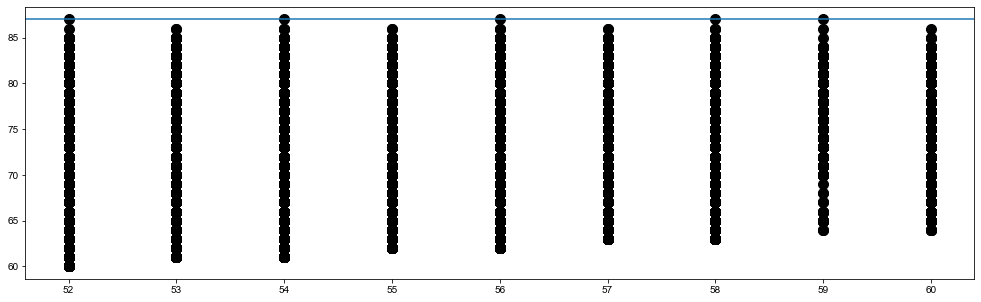

In [154]:
fig, ax = plt.subplots()

ax = ax.scatter(Alist, ABlist, s = 100, color='k')

plt.axhline(87)

plt.rcParams["font.family"] = "Arial"

fig.set_size_inches(17, 5)
plt.show()

As we can see, 87 (blue line) appears to be the limit. 

Given that that leaves just 5 games, that's a pretty good result.

In [338]:
games = list(bestdf['Games'])
ids = list(bestdf['GroupID'])

Alist, Blist, ABlist = [], [], []

i = 0
for x in range(len(ids)):
    
    A = games[i]
   
    j = i+1
    for y in range(len(ids) - j):
        
        B = games[j]
        
        AB = A + list(set(B) - set(A))

    
        ##print(i, j, ids[i], '\t', ids[j], '\t', len(A), len(B), len(AB))
        
        Alist.append(len(A))
        Blist.append(len(B))
        ABlist.append(len(AB))
        
        j += 1  
        
    i += 1

In [1]:
fig, ax = plt.subplots()

ax = ax.scatter(Alist, ABlist, s = 100, color='k')

plt.axhline(87)

plt.rcParams["font.family"] = "Arial"

fig.set_size_inches(17, 5)
plt.show()

NameError: name 'plt' is not defined

In [111]:
# lets deal with that   ... it will cut processing time in half!



start_time = time.time()

ids = poss

droplist = []

bestlen = list(poss)
bestlen = len(bestlen) / 2
print(f'Target: {bestlen}')

for id1 in ids: 
        
        x =  set(id1)

        for id2 in ids:
            y = set(id2)

            if id1 != id2:
                if len(x-y) == len(x):
                                            
                        if id1 not in droplist:
                            droplist.append(id2)                       # need to drop these after your loop is finished
                            bestlen -= 1
                            #print(bestlen, end='  ')
                            
                            if bestlen % 10 == 0:
                                gap = time.time() - start_time
                                print(f'{bestlen}, %s ' % (gap))
                            
                        
bestdf = bestdf.copy()
for id in droplist:
    bestdf.drop(bestdf.loc[bestdf['GroupID'] == id].index, inplace=True)
    
bestdf

print(len(droplist))


Target: 92378.0


KeyboardInterrupt: 

....

### NARROW IT DOWN

Let's narrow it down to all groups with 50 or over. That's less than 9000 rows.

In [334]:
bestdf = bubbledf.loc[bubbledf['Ttl'] >= 50]

bestdf

,GroupID,PoolA1,Games,Ttl
15,15,"(ARS, BRI, BUR, CHE, LIV, NOR, SHE, SOU, WAT, WES)","[2, 5, 7, 9, 14, 17, 18, 19, 22, 26, 27, 28, 29, 31, 33,...",50
21,21,"(AST, CHE, CRY, EVE, LEI, MUN, SHE, TOT, WES, WOL)","[0, 2, 4, 5, 6, 8, 9, 11, 12, 17, 19, 20, 22, 23, 26, 27...",58
25,25,"(ARS, BUR, CHE, CRY, EVE, LEI, LIV, MCI, NOR, WAT)","[0, 1, 3, 4, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 2...",50
31,31,"(BRI, BUR, EVE, LEI, LIV, MCI, NEW, SHE, SOU, WAT)","[1, 3, 4, 6, 7, 8, 9, 10, 12, 17, 18, 21, 22, 26, 27, 29...",50
43,43,"(AFC, AST, CHE, EVE, LEI, MUN, SHE, SOU, TOT, WAT)","[0, 1, 4, 5, 6, 8, 9, 11, 15, 20, 22, 23, 24, 27, 30, 31...",50
...,...,...,...,...
184711,184711,"(AFC, AST, CHE, CRY, EVE, MUN, SHE, SOU, TOT, WOL)","[0, 1, 4, 5, 6, 7, 9, 11, 17, 18, 20, 21, 23, 26, 27, 30...",56
184724,184724,"(AFC, ARS, AST, CRY, EVE, LEI, MUN, NEW, TOT, WOL)","[2, 4, 7, 9, 14, 16, 17, 18, 22, 26, 28, 29, 30, 31, 33,...",54
184736,184736,"(AFC, AST, EVE, LEI, MCI, MUN, NEW, SHE, TOT, WES)","[2, 3, 5, 9, 11, 12, 14, 15, 17, 19, 20, 22, 23, 24, 27,...",51
184738,184738,"(AFC, ARS, AST, CRY, EVE, LEI, MCI, MUN, SHE, TOT)","[0, 2, 7, 8, 9, 11, 17, 20, 22, 23, 29, 31, 32, 33, 35, ...",50


In fact, we can narrow it down further. 

Each bubble has it's mirrored or companion bubble.

Consider the following two bubbles, and see that one minus the other still leaves a set of 10.

In [335]:
print(bubbledf['PoolA1'].iloc[34349])
print(bubbledf['PoolA1'].iloc[147363])
print(set(bubbledf['PoolA1'].iloc[34349]) - set(bubbledf['PoolA1'].iloc[147363]))

('ARS', 'BRI', 'BUR', 'LIV', 'MCI', 'NEW', 'NOR', 'SOU', 'WAT', 'WES')
('AFC', 'AST', 'CHE', 'CRY', 'EVE', 'LEI', 'MUN', 'SHE', 'TOT', 'WOL')
{'NOR', 'BUR', 'WES', 'LIV', 'MCI', 'SOU', 'WAT', 'BRI', 'ARS', 'NEW'}


In [336]:
# lets deal with that   ... it will cut processing time in half!

ids = list(bestdf['GroupID'])

droplist = []

bestlen, _ = bestdf.shape
bestlen = bestlen / 2
print('To go: ')

for id1 in ids:      
        x =  set(bestdf['PoolA1'].loc[id1])

        for id2 in ids:
            y = set(bestdf['PoolA1'].loc[id2])

            if id1 != id2:
                if len(x-y) == len(x):
                                            
                        if id1 not in droplist:
                            droplist.append(id2)                       # need to drop these after your loop is finished
                            bestlen -= 1
                            print(bestlen, end='  ')
                        
bestdf = bestdf.copy()
for id in droplist:
    bestdf.drop(bestdf.loc[bestdf['GroupID'] == id].index, inplace=True)
    
bestdf


To go: 
4396.0  4395.0  4394.0  4393.0  4392.0  4391.0  4390.0  4389.0  4388.0  4387.0  4386.0  4385.0  4384.0  4383.0  4382.0  4381.0  4380.0  4379.0  4378.0  4377.0  4376.0  4375.0  4374.0  4373.0  4372.0  4371.0  4370.0  4369.0  4368.0  4367.0  4366.0  4365.0  4364.0  4363.0  4362.0  4361.0  4360.0  4359.0  4358.0  4357.0  4356.0  4355.0  4354.0  4353.0  4352.0  4351.0  4350.0  4349.0  4348.0  4347.0  4346.0  4345.0  4344.0  4343.0  4342.0  4341.0  4340.0  4339.0  4338.0  4337.0  4336.0  4335.0  4334.0  4333.0  4332.0  4331.0  4330.0  4329.0  4328.0  4327.0  4326.0  4325.0  4324.0  4323.0  4322.0  4321.0  4320.0  4319.0  4318.0  4317.0  4316.0  4315.0  4314.0  4313.0  4312.0  4311.0  4310.0  4309.0  4308.0  4307.0  4306.0  4305.0  4304.0  4303.0  4302.0  4301.0  4300.0  4299.0  4298.0  4297.0  4296.0  4295.0  4294.0  4293.0  4292.0  4291.0  4290.0  4289.0  4288.0  4287.0  4286.0  4285.0  4284.0  4283.0  4282.0  4281.0  4280.0  4279.0  4278.0  4277.0  4276.0  4275.0  4274.0  4273.0  

,GroupID,PoolA1,Games,Ttl
15,15,"(ARS, BRI, BUR, CHE, LIV, NOR, SHE, SOU, WAT, WES)","[2, 5, 7, 9, 14, 17, 18, 19, 22, 26, 27, 28, 29, 31, 33,...",50
21,21,"(AST, CHE, CRY, EVE, LEI, MUN, SHE, TOT, WES, WOL)","[0, 2, 4, 5, 6, 8, 9, 11, 12, 17, 19, 20, 22, 23, 26, 27...",58
25,25,"(ARS, BUR, CHE, CRY, EVE, LEI, LIV, MCI, NOR, WAT)","[0, 1, 3, 4, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 2...",50
31,31,"(BRI, BUR, EVE, LEI, LIV, MCI, NEW, SHE, SOU, WAT)","[1, 3, 4, 6, 7, 8, 9, 10, 12, 17, 18, 21, 22, 26, 27, 29...",50
43,43,"(AFC, AST, CHE, EVE, LEI, MUN, SHE, SOU, TOT, WAT)","[0, 1, 4, 5, 6, 8, 9, 11, 15, 20, 22, 23, 24, 27, 30, 31...",50
...,...,...,...,...
178172,178172,"(AFC, CRY, EVE, LEI, MUN, SHE, SOU, TOT, WAT, WOL)","[0, 1, 4, 5, 6, 7, 9, 14, 16, 18, 20, 22, 23, 27, 29, 30...",55
178896,178896,"(ARS, AST, BRI, BUR, CHE, MCI, NOR, SHE, WAT, WOL)","[0, 4, 5, 6, 7, 9, 10, 11, 12, 15, 16, 17, 26, 27, 28, 3...",50
180302,180302,"(ARS, AST, CRY, EVE, LEI, LIV, SHE, TOT, WES, WOL)","[2, 4, 8, 10, 11, 12, 15, 16, 17, 22, 23, 25, 26, 28, 31...",51
181555,181555,"(ARS, AST, BRI, MCI, MUN, NEW, NOR, SOU, WAT, WES)","[0, 2, 5, 7, 10, 14, 15, 18, 19, 22, 23, 24, 25, 27, 31,...",53


Now lets see which bubbles work best together.

In [338]:
games = list(bestdf['Games'])
ids = list(bestdf['GroupID'])

Alist, Blist, ABlist = [], [], []

i = 0
for x in range(len(ids)):
    
    A = games[i]
   
    j = i+1
    for y in range(len(ids) - j):
        
        B = games[j]
        
        AB = A + list(set(B) - set(A))

    
        ##print(i, j, ids[i], '\t', ids[j], '\t', len(A), len(B), len(AB))
        
        Alist.append(len(A))
        Blist.append(len(B))
        ABlist.append(len(AB))
        
        j += 1  
        
    i += 1

In [1]:
fig, ax = plt.subplots()

ax = ax.scatter(Alist, ABlist, s = 100, color='k')

plt.axhline(87)

plt.rcParams["font.family"] = "Arial"

fig.set_size_inches(17, 5)
plt.show()

NameError: name 'plt' is not defined

In [51]:
#testdf = bubbledf.loc[(bubbledf['Ttl'] >= 57) | (bubbledf['Ttl'] <= 33)]

Xdf = bubbledf.loc[(bubbledf['Ttl'] >= 56) & (bubbledf['Ttl'] <= 60)]

Ydf = bubbledf.loc[(bubbledf['Ttl'] >= 28) & (bubbledf['Ttl'] <= 32)]


,GroupID,PoolA1,Games,Ttl
0,0,"(AFC, AST, BRI, BUR, CHE, LIV, NOR, TOT, WAT, WOL)","[0, 3, 6, 17, 18, 19, 20, 26, 31, 32, 34, 35, 37, 39, 40...",35
2,2,"(AFC, ARS, BUR, CHE, EVE, LEI, LIV, MUN, NEW, SOU)","[8, 10, 11, 12, 19, 23, 26, 28, 31, 35, 36, 43, 45, 47, ...",33
48,48,"(AST, BRI, CRY, MCI, MUN, NOR, SHE, TOT, WAT, WOL)","[9, 10, 11, 19, 20, 23, 25, 26, 28, 29, 31, 32, 35, 43, ...",33
107,107,"(AFC, BRI, LIV, MCI, NOR, SHE, TOT, WAT, WES, WOL)","[6, 8, 12, 14, 18, 19, 23, 24, 30, 31, 35, 37, 42, 43, 4...",32
143,143,"(AFC, AST, BUR, CHE, LIV, NEW, NOR, SOU, TOT, WOL)","[0, 1, 2, 5, 6, 14, 18, 20, 21, 25, 26, 28, 31, 37, 39, ...",35
...,...,...,...,...
184253,184253,"(BUR, CHE, EVE, LEI, MCI, MUN, NEW, NOR, SOU, WOL)","[2, 4, 5, 7, 11, 12, 13, 15, 16, 23, 31, 34, 39, 42, 45,...",33
184420,184420,"(AFC, BRI, LIV, MCI, MUN, NOR, SHE, TOT, WAT, WOL)","[6, 9, 14, 18, 19, 20, 23, 24, 25, 29, 30, 31, 32, 35, 3...",32
184482,184482,"(CRY, LEI, LIV, MCI, NEW, NOR, SOU, TOT, WES, WOL)","[2, 5, 6, 8, 11, 12, 15, 17, 20, 25, 30, 32, 34, 36, 37,...",33
184611,184611,"(AFC, ARS, BRI, BUR, CHE, CRY, EVE, NOR, SHE, WES)","[1, 5, 7, 9, 13, 14, 22, 24, 26, 27, 29, 30, 34, 35, 38,...",34


In [333]:
poss = set(itertools.combinations(teams, 10))      # all 184,756 combos of available teams. sets are easier to deal with for this task
print(f'There are {len(poss)} possible combinations of teams.')

There are 184756 possible combinations of teams.


In [332]:
Alist, Blist, ABlist = [], [], []

for x in reversed(range(28,61)):
    
    print(x)
    A = games[x]
    
    for y in reversed(range(28,61)):
        if x + y >= 87:
            print(x,y)
            
            
i = 0
for x in range(len(ids)):
    
    A = games[i]
   
    j = i+1
    for y in range(len(ids) - j):
        
        B = games[j]
        
        AB = A + list(set(B) - set(A))

    
        ##print(i, j, ids[i], '\t', ids[j], '\t', len(A), len(B), len(AB))
        
        Alist.append(len(A))
        Blist.append(len(B))
        ABlist.append(len(AB))
        
        j += 1  
        
    i += 1

60
60 60
60 59
60 58
60 57
60 56
60 55
60 54
60 53
60 52
60 51
60 50
60 49
60 48
60 47
60 46
60 45
60 44
60 43
60 42
60 41
60 40
60 39
60 38
60 37
60 36
60 35
60 34
60 33
60 32
60 31
60 30
60 29
60 28
59
59 60
59 59
59 58
59 57
59 56
59 55
59 54
59 53
59 52
59 51
59 50
59 49
59 48
59 47
59 46
59 45
59 44
59 43
59 42
59 41
59 40
59 39
59 38
59 37
59 36
59 35
59 34
59 33
59 32
59 31
59 30
59 29
59 28
58
58 60
58 59
58 58
58 57
58 56
58 55
58 54
58 53
58 52
58 51
58 50
58 49
58 48
58 47
58 46
58 45
58 44
58 43
58 42
58 41
58 40
58 39
58 38
58 37
58 36
58 35
58 34
58 33
58 32
58 31
58 30
58 29
57
57 60
57 59
57 58
57 57
57 56
57 55
57 54
57 53
57 52
57 51
57 50
57 49
57 48
57 47
57 46
57 45
57 44
57 43
57 42
57 41
57 40
57 39
57 38
57 37
57 36
57 35
57 34
57 33
57 32
57 31
57 30
56
56 60
56 59
56 58
56 57
56 56
56 55
56 54
56 53
56 52
56 51
56 50
56 49
56 48
56 47
56 46
56 45
56 44
56 43
56 42
56 41
56 40
56 39
56 38
56 37
56 36
56 35
56 34
56 33
56 32
56 31
55
55 60
55 59
55 58
55 57
55 5

In [374]:
playables = list(bubbledf['Games'])

dfB = pd.DataFrame(columns=['A','B','AB','ID','ID2'])

Alist = []
Blist = []
ABlist = []
IDlist = []
ID2list = []

def poolB(param1):
    
    df = pd.DataFrame()
    
    print(f'*** {param1} ***')

    # firstly, filter in bubbles with the highest results
    for games in playables:
        
        id = playables.index(games)
        A = playables[id] 
        cogroups = []
        
        if len(A) >= param1:
            
            print(id, len(A))
            
            # now, calc all 184k double-bubble combos
                        
            '''j = groupID + 1
            while j < len(playables):
                
                B = playables[j]
                
                AB = A + list(set(B) - set(A))
                 
                if len(AB) >= 85:                      # we only about results that will get us close to our target
                        
                        cogroups.append(j)          

                        print(f'{len(A)} & {len(B)} >> {len(AB)}\t\t A: {id}, B: {cogroups[-1]}')
                        
                        Alist.append(len(A))
                        Blist.append(len(B))
                        ABlist.append(len(AB))
                        IDlist.append(id)
                        ID2list.append(cogroups[-1])
                        #print(Alist, Blist, ABlist, IDlist, ID2list)
                        #print(ABlist)
                                                                        
                j += 1'''
                
            
#for x in reversed(range(58, 61)):
poolB(x)


*** 60 ***
47341 60
65158 60
47341 60
90153 60


KeyboardInterrupt: 

In [ ]:
X = []
Y = []
for x in reversed(range(40, 61)):
    groupID, best, cogroups = poolB(x)
    #print(x,groupID, best, cogroups)
    #X.append(len(a))
    #Y.append(len(ab))

In [236]:
bD = bubbledf['Ttl']
bC = bubbledf['Games']
bC = bubbledf['PoolA1']
bA = bubbledf['GroupID']

def poolB(param1):

    start_time = time.time()
    
    print(param1)

    for groupID in playables:
        
        cogroups = []
        a = playables[groupID]   
        best = 0 

        if len(a) == param1:

            j = groupID + 1
            while j < len(playables):
                
                b = playables[j]
                
                if len(b) <= param1:       #stops multiples

                    ab = a + list(set(b) - set(a))
                     
                    if len(ab) > 80:       
                        cogroups.append(j)          

                        print(f'{len(a)} & {len(b)} >> {len(ab)}\t\t A: {groupID}, B: {cogroups[-1]}')

                        print()
                                        
                j += 1
                

    
    return groupID, best, cogroups


In [2]:
X = []
Y = []
for x in reversed(range(40, 61)):
    groupID, best, cogroups = poolB(x)
    #print(x,groupID, best, cogroups)
    X.append(len(a))
    Y.append(len(ab))

NameError: name 'time' is not defined

In [ ]:
#CHECK

i = 0
j = 0

A = 88370 



for game in remaining:
    
    print(i, game, end='')

    
    if game[0] in l2[A] and game[1] in l2[A]:
        j += 1
        print(j, '*')
        
    elif game[0] not in l2[A] and game[1] not in l2[A]:
        j += 1
        print(j, '**')
        
    
    else:
        print()
        
    i += 1

    
    

In [305]:
restart

NameError: name 'restart' is not defined

In [ ]:
d = bubbledf['Ttl']
c = bubbledf['Games']

i = 0

while i < len(d):
    
    a = c[i]

    if d[i] > 58:
        
        j = i + 1
        while j < len(d):
            
            b = c[j]
            
            ab = a + list(set(b) - set(a))
            
            print(i,j, len(a), len(b), len(ab))
            
            input()
            
    i += 1

In [ ]:
###########################################3

In [262]:
#### sets version
# for ease of handling, puts the pools in a reference dict with the groups id and the playable games for that pool in another

start_time = time.time()

playables = {}
pools = {}

print('!')     # to show it has started.Sometimes it jams

groupID = 0
for combo in poss:
    
    if groupID % 10000 == 0:
        print(groupID)
                
    playable_mini = []
    
    otherpool = set(teams) - set(combo)
    
    for game in remaining:
        
        gameID = remaining.index(game)
        
        if game[0] in combo and game[1] in combo:
            playable_mini.append(gameID)
        elif game[0] not in combo and game[1] not in combo:
            playable_mini.append(gameID)
            
    playables[groupID] = playable_mini
    
    pools[groupID] = {combo}
        
    groupID += 1
           
print("--- %s seconds ---" % (time.time() - start_time))

!
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
--- 82.78979158401489 seconds ---


In [266]:
# lets build it into a dataframe

playablesdf = pd.DataFrame(index=playables.keys())
playablesdf['playable A'] = playables.values()

howmany = [len(x) for x in playables.values()]
playablesdf['how many A'] = howmany

playablesdf['poolA1'] = pools

m = max(howmany)
print(f'The most games that could be played is {m}. That leaves {len(remaining) - m} left to be played.')

playablesdf

The most games that could be played is 60. That leaves 32 left to be played.


,playable A,how many A,poolA1
0,"[3, 10, 12, 13, 16, 18, 22, 23, 26, 27, 29, 31...",42,0
1,"[0, 5, 7, 8, 10, 12, 14, 17, 21, 22, 23, 25, 2...",45,1
2,"[0, 1, 5, 7, 10, 12, 14, 15, 16, 20, 21, 24, 2...",45,2
3,"[0, 1, 3, 6, 9, 12, 13, 16, 17, 18, 21, 22, 27...",43,3
4,"[2, 3, 4, 6, 11, 12, 13, 14, 17, 22, 23, 24, 2...",45,4
...,...,...,...
184751,"[2, 3, 4, 5, 6, 7, 8, 10, 13, 16, 17, 18, 19, ...",50,184751
184752,"[1, 2, 3, 4, 5, 6, 12, 13, 16, 17, 18, 19, 23,...",40,184752
184753,"[1, 3, 7, 9, 11, 12, 14, 15, 21, 22, 24, 26, 2...",43,184753
184754,"[0, 1, 3, 5, 6, 8, 9, 12, 13, 18, 21, 26, 27, ...",41,184754


[ THIS UPGRADE OF THE INITIAL SCRIPT IS VERSION 2.0, DONE IN SEPT/OCT ]

In [145]:
### 10 in pool version
## this first part is just recalcing 

poss = set(itertools.combinations(teams, 10))  

start_time = time.time()

#playables = {}
pools = {}

print('!')     # to show it has started.Sometimes it jams

groupID = 0
for combo in poss:
    
    if groupID % 10000 == 0:
        print(groupID)
                
    playable_mini = []
        
    for game in remaining:
        
        gameID = remaining.index(game)
        
        if game[0] in combo and game[1] in combo:
            playable_mini.append(gameID)
        elif game[0] in combo and game[1] in otherpool:
            playable_mini.append(gameID)
            
    playables[groupID] = playable_mini
    
    pools[groupID] = {'Pool A1': combo, 'Pool A2': otherpool}
        
    groupID += 1
           
print("--- %s seconds ---" % (time.time() - start_time))

# this sorts out pool B

poolBs = {}
start_time = time.time()

timetest = {}

#print('groupID, best, cogroups')

for groupID in playables:
    cogroups = []
    a = playables[groupID]   
    best = 0       
    
    j = groupID + 1
    while j < len(playables):                     
        b = playables[j]   
        ab = a + list(set(b) - set(a))
        if len(ab) > best:
            best = len(ab)       
            cogroups.append(j)          
        j += 1    
    
    poolBs[groupID] = dict(best = best, cogroups = cogroups)   
    
    if groupID % 100 == 0:
        gap = time.time() - start_time
        timetest[groupID] = gap
        print(f'{groupID}, %s ' % (gap))
        

!
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
--- 79.76600861549377 seconds ---
0, 2.7306933403015137 
100, 216.9715805053711 
200, 437.3161361217499 


KeyboardInterrupt: 